##CA2 Data Mining
Name: Erfan Shahabi
<br>
Student ID: 810103166

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DM-CA2/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


##1

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
در این بخش هدف، ساخت star schema برای سیستم data warehouse بر اساس مجموعه داده فروش سوپر مارکت ایت. این مدل شامل یک Fact Table و چندین Dimension Table است.
ابتدا Dimension Table برای مشتری ها تشکیل شده است به این صورت که این جدول شامل نوع مشتری به عنوان عضو یا عادی و جنسیت است و به هر ترکیب یکتا از این دو ویژگی یک Customer_ID اختصاص داده شده است.
سپس جدول Dimension Table به همین ترتیب برای مابقی ویژگی ها هم تشکیل می شوند.
<br>
سپس در مرحله بعد پس از ایجاد جداول ابعاد کلید های اصلی از جداول بعدی به داده های اصلی متصل می شوند. نتیجه این کار این است که جدول نهایی آماده سازی شده که شامل شناسه ها یکتا برای هر بعد است.
<br>
سپس در مرحله بعدی به سراغ ساخت جدول Fact Table می رویم.
این جدول شامل متغیر های کلیدی مربوط به هر تراکنش فروش است. ست.ن های عددی مانند Marginr, COGs, Quantity, Rating در این جدول ذخیره شده اند.
کلید های خارجی برای اتصال به جداول dimension نیز وجود دارد.
در نهایت هم چند سطر اول برای اطمینان از صحت ساختار داده چاپ می شوند.


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
ساخت dimension table برای customers

In [24]:
customers_dim_star = df[['Customer type','Gender']].drop_duplicates().reset_index(drop=True)
customers_dim_star['Customer_ID'] = customers_dim_star.index
customers_dim_star.head()

,Customer type,Gender,Customer_ID
0,Member,Female,0
1,Normal,Female,1
2,Normal,Male,2
3,Member,Male,3


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
ساخت dimension table برای بقیه ویژگی ها

In [5]:

branch_dim_star = df[['Branch', 'City']].drop_duplicates().reset_index(drop=True)
branch_dim_star['Branch_ID'] = branch_dim_star.index


product_dim_star = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)
product_dim_star['Product_ID'] = product_dim_star.index


datetime_dim_star = df[['Date', 'Time']].drop_duplicates().reset_index(drop=True)
datetime_dim_star['DateTime_ID'] = datetime_dim_star.index


financial_dim_star = df[['Tax 5%', 'gross margin percentage', 'gross income']].drop_duplicates().reset_index(drop=True)
financial_dim_star['Financial_ID'] = financial_dim_star.index


payment_dim_star = df[['Payment']].drop_duplicates().reset_index(drop=True)
payment_dim_star['Payment_ID'] = payment_dim_star.index

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
اتصال کلید های خارجی به جدول اصلی و ساخت Fact Table

In [6]:
df_star = df.copy()
df_star = df_star.merge(customers_dim_star, on=['Customer type', 'Gender'], how='left')

df_star = df_star.merge(branch_dim_star, on=['Branch', 'City'], how='left')

df_star = df_star.merge(product_dim_star, on=['Product line', 'Unit price'], how='left')

df_star = df_star.merge(datetime_dim_star, on=['Date', 'Time'], how='left')

df_star = df_star.merge(financial_dim_star, on=['Tax 5%', 'gross margin percentage','gross income'], how='left')

df_star = df_star.merge(payment_dim_star, on=['Payment'], how='left')
fact_table_star = df_star[[
    'Invoice ID',
    'Customer_ID',
    'Branch_ID',
    'Product_ID',
    'DateTime_ID',
    'Payment_ID',
    'Quantity',
    'cogs',
    'Total',
    'Rating'
]]


fact_table_star.head()



,Invoice ID,Customer_ID,Branch_ID,Product_ID,DateTime_ID,Payment_ID,Quantity,cogs,Total,Rating
0,750-67-8428,0,0,0,0,0,7,522.83,548.9715,9.1
1,226-31-3081,1,1,1,1,1,5,76.40,80.2200,9.6
2,631-41-3108,2,0,2,2,2,7,324.31,340.5255,7.4
3,123-19-1176,3,0,3,3,0,8,465.76,489.0480,8.4
4,373-73-7910,2,0,4,4,0,7,604.17,634.3785,5.3


In [7]:
print("Fact Table records", fact_table_star.shape[0])
print("invoices number", fact_table_star['Invoice ID'].nunique())


Fact Table records 1000
invoices number 1000


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
در این بخش نیز ساختار snowflake schema برای داده های داده شده طراحی شده است. در ابتدا، Dimension Table مربوط به مشتریان ساخته شده است. این جدول شامل دو ویژگی جنسیت و نوع مشتری است و به هر ترتیب یکتای این دو ویژگی یک شناسه منحصر به فرد تحت عنوان Customer_ID اختصاص داده شده است. به همین ترتیب جداول ابعادی برای سایر ویژگی ها نیز ساخته می شود.
در مرحله بعد، Primary Key ها از جداول ابعاد به داده های اصلی متصل شده اند. برای این منظور، جدول اصلی به صورت گام به گام با هر جدول بعدی بر اساس ویژگی های مشترک marge شده است. در نتیجه این مرحله، تشکیل یک جدول تجمیعی است که در آن به هر رکورد، کلید های خارجی مرتبط با ابعاد اختصاص داده شده است. سپس در مرحله نهایی، جدول Fact Table ساخته می شود. این جدول شامل متغیر های کلیدی مرتبط با هر تراکنش فروش مانند Rating, gross income و ... و همچنین کلیدهای خارجی برای اتصال به جداول Dimension است. در مرحله نهایی جدول Fact Table تحت عنوان fact_table_snow آماده شده و در پابان چند سطر اول آن نمایش داده می شود تا از صحت ساختار و اتصال ابعاد به این جدول اطمینان حاصل شود.


In [8]:
gender_dim = df[['Gender']].drop_duplicates().reset_index(drop=True)
gender_dim['Gender_ID'] = gender_dim.index

cust_type_dim = df[['Customer type']].drop_duplicates().reset_index(drop=True)
cust_type_dim['CustomerType_ID'] = cust_type_dim.index

city_dim = df[['City']].drop_duplicates().reset_index(drop=True)
city_dim['City_ID'] = city_dim.index

product_line_dim = df[['Product line']].drop_duplicates().reset_index(drop=True)
product_line_dim['ProductLine_ID'] = product_line_dim.index

payment_dim = df[['Payment']].drop_duplicates().reset_index(drop=True)
payment_dim['Payment_ID'] = payment_dim.index

customer_dim = df[['Customer type', 'Gender']].drop_duplicates().reset_index(drop=True)
customer_dim = customer_dim.merge(gender_dim, on='Gender')
customer_dim = customer_dim.merge(cust_type_dim, on='Customer type')
customer_dim['Customer_ID'] = customer_dim.index
customer_dim = customer_dim[['Customer_ID', 'Gender_ID', 'CustomerType_ID']]

branch_dim = df[['Branch', 'City']].drop_duplicates().reset_index(drop=True)
branch_dim = branch_dim.merge(city_dim, on='City')
branch_dim['Branch_ID'] = branch_dim.index
branch_dim = branch_dim[['Branch_ID', 'Branch', 'City_ID']]

product_dim = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)
product_dim = product_dim.merge(product_line_dim, on='Product line')
product_dim['Product_ID'] = product_dim.index
product_dim = product_dim[['Product_ID', 'Unit price', 'ProductLine_ID']]

datetime_dim = df[['Date', 'Time']].drop_duplicates().reset_index(drop=True)
datetime_dim['DateTime_ID'] = datetime_dim.index

financial_dim = df[['Tax 5%', 'gross margin percentage', 'gross income']].drop_duplicates().reset_index(drop=True)
financial_dim['Financial_ID'] = financial_dim.index
df_merged = df.copy()


df_merged = df_merged.merge(gender_dim, on='Gender')
df_merged = df_merged.merge(cust_type_dim, on='Customer type')
df_merged = df_merged.merge(customer_dim, on=['Gender_ID', 'CustomerType_ID'])

df_merged = df_merged.merge(city_dim, on='City')
df_merged = df_merged.merge(branch_dim, on=['Branch', 'City_ID'])

df_merged = df_merged.merge(product_line_dim, on='Product line')
df_merged = df_merged.merge(product_dim, on=['Unit price', 'ProductLine_ID'])

df_merged = df_merged.merge(datetime_dim, on=['Date', 'Time'])


df_merged = df_merged.merge(financial_dim, on=['Tax 5%', 'gross margin percentage', 'gross income'])

df_merged = df_merged.merge(payment_dim, on='Payment')

fact_table_snow = df_merged[[
    'Invoice ID',
    'Customer_ID',
    'Branch_ID',
    'Product_ID',
    'DateTime_ID',
    'Financial_ID',
    'Payment_ID',
    'Quantity',
    'cogs',
    'Total',
    'Rating'
]]

fact_table_snow.head()

,Invoice ID,Customer_ID,Branch_ID,Product_ID,DateTime_ID,Financial_ID,Payment_ID,Quantity,cogs,Total,Rating
0,750-67-8428,0,0,0,0,0,0,7,522.83,548.9715,9.1
1,226-31-3081,1,1,1,1,1,1,5,76.40,80.2200,9.6
2,631-41-3108,2,0,2,2,2,2,7,324.31,340.5255,7.4
3,123-19-1176,3,0,3,3,3,0,8,465.76,489.0480,8.4
4,373-73-7910,2,0,4,4,4,0,7,604.17,634.3785,5.3


In [9]:
print("Fact Table records", fact_table_snow.shape[0])
print("invoices number", fact_table_snow['Invoice ID'].nunique())


Fact Table records 1000
invoices number 1000


##ب

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
برای ارزیابی کارایی مدل‌ سازی داده‌ ها از منظر مصرف حافظه، میزان حافظه اشغال ‌شده توسط دو مدل Star Schema و Snowflake Schema اندازه ‌گیری شده است.
نتایج به ‌دست ‌آمده به شرح زیر است:
• Star Schema:
• مصرف حافظه: 399,502 بایت
• معادل با: 0.4 مگابایت

-----------------------------------

• Snowflake Schema:
• مصرف حافظه: 341,363 بایت
• معادل با: 0.34 مگابایت


با مقایسه این مقادیر مشخص می ‌شود که Snowflake Schema حدود 58 کیلوبایت حافظه کمتری نسبت به Star Schema مصرف می‌کند.
این اختلاف به‌دلیل جدا کردن ویژگی ‌های تکرا رشونده به جداول ابعادی نرمال ‌شده در Snowflake است که موجب کاهش افزونگی داده و در نتیجه، کاهش مصرف حافظه می‌شود.
این مقایسه نشان می ‌دهد که در شرایطی که کاهش مصرف حافظه یا فشرده‌سازی داده اهمیت دارد، استفاده از Snowflake Schem می‌تواند گزینه بهینه‌تری باشد.


In [10]:
memory_star = (
    customers_dim_star.memory_usage(deep=True).sum() +
    branch_dim_star.memory_usage(deep=True).sum() +
    product_dim_star.memory_usage(deep=True).sum() +
    datetime_dim_star.memory_usage(deep=True).sum() +
    financial_dim_star.memory_usage(deep=True).sum() +
    payment_dim_star.memory_usage(deep=True).sum() +
    fact_table_star.memory_usage(deep=True).sum()
)

print("Star Schema memory usage (bytes):", memory_star)
print("Star Schema memory usage (MB):", round(memory_star / 1e6, 2))

Star Schema memory usage (bytes): 399502
Star Schema memory usage (MB): 0.4


In [11]:
memory_snow = (
    gender_dim.memory_usage(deep=True).sum() +
    cust_type_dim.memory_usage(deep=True).sum() +
    city_dim.memory_usage(deep=True).sum() +
    product_line_dim.memory_usage(deep=True).sum() +
    payment_dim.memory_usage(deep=True).sum() +
    customer_dim.memory_usage(deep=True).sum() +
    branch_dim.memory_usage(deep=True).sum() +
    product_dim.memory_usage(deep=True).sum() +
    datetime_dim.memory_usage(deep=True).sum() +
    financial_dim.memory_usage(deep=True).sum() +
    fact_table_snow.memory_usage(deep=True).sum()
)
print("Star Schema memory usage (bytes):", memory_snow)
print("Snowflake memory usage (MB):", round(memory_snow / 1e6, 2))

Star Schema memory usage (bytes): 341363
Snowflake memory usage (MB): 0.34


##سوال ۲
## قسمت های الف و ب

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
هدف این بخش، مقایسه زمان اجرای عملیات aggregation در دو ساختار متفاوت Star Schema و  Snowflake Schema است. برای این منظور،‌مجموع فروش Total برای هر Product line را محاسبه کردیم.
برای مدل star schema ابتدا جدول fact table آن مستقیما با جدول product_dim_star ادغام شده است. ستون product line به صورت مستقیم در جدول ابعاد وجود دارد و عملیات groupby بلافاصله روی آن انجام شده است.
برای مدل snowflake نیز ابتدا جدول fact table آن با جدول product_dim ادغام شده است. سپس برای دستیابی به نام محصول، یک join  اضافی با جذول product_line_dim نیز انجام شده است. پس از آن عملیات groupby روی ستون product line انجام شده است. نتایج به شرح زیر است:
<br>
Star Schema: 0.003571 Seconds
<br>
Snowflake Schema: 0.005694 Seconds
<br>
همانطور که از نتایج مشخص است مدل star سریع تر از مدل snowflake عمل کرده است. این تفاوت به دلیل تعداد کمتر join در مدل star است. در star schema، ویژگی هایی مانند product_line مستقیما در جدول ابعاد ذخیره شده اند در حالی که در snowflake schem نیاز به join  های زنجیره ای برای دستیابی به همان ویژگی ها است. اگر چه snowflake از نظر نرمال سازی و بهینه سازی فضای ذخیره سازی عملکرد بهتری دارد، اما در شرایطی که هدف انجام تحلیل سریع و مکرر است، مدل star کارایی بهتری از نظر زمان پاسخ دارد.


In [13]:
import time


start_star = time.time()


df_star_grouped = fact_table_snow.merge(product_dim_star, on='Product_ID', how='left')
total_by_product_star = df_star_grouped.groupby('Product line')['Total'].sum()

end_star = time.time()
time_star = end_star - start_star

start_snow = time.time()


df_snow_grouped = fact_table_snow.merge(product_dim, on='Product_ID', how='left')
df_snow_grouped = df_snow_grouped.merge(product_line_dim, on='ProductLine_ID', how='left')
total_by_product_snow = df_snow_grouped.groupby('Product line')['Total'].sum()
end_snow = time.time()
time_snow = end_snow - start_snow

print("Star Run Time:", round(time_star, 6), "Seconds")
print("Snowflake Run Time:", round(time_snow, 6), "Seconds")

if time_star < time_snow:
    print("Star was faster")
else:
    print("Snowflake was faster")

Star Run Time: 0.007659 Seconds
Snowflake Run Time: 0.011988 Seconds
Star was faster


## 3

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
هدف این بخش تحلیل روند فروش در طول زمان با استفاده از Fact Table و جدول DateTime Dimension در ساختار star schema است.
برای این بخش ابتدا جدول fact_table_star با جدول datetime_dim_star بر اساس کلید DateTime_ID ادغام شد. سپس ستون Date به فرمت تاریخ میلادی (DateTime) تبدیل گردید تا امکان استخراج اجزای زمانی مانند سال و ماه فراهم شود.
سپس با استفاده از تابع dt در پانداس ستون های جدی Year و Month از تاریخ استخراج شدند. همچنین شماره ماه (Month_Num) نیز برای مرتب سازی منطقی رکورد ها استفاده شدند.
در مرحله بعد مجموع فروش برای هر ترکیب Year و Month را نحاسبه کردم و برای حفظ ترتیب ماه ها، جدول نهایی بر اساس Year و Month مرتب گردید.
در مرحله بعد برای هر سال موجود در داده ها، مجموع فروش به صورت جداگانه محاسبه شده و در جدول Yearly_sales ذخیره گردد.
در نهایت نیز نمودار ها را رسم کردم.


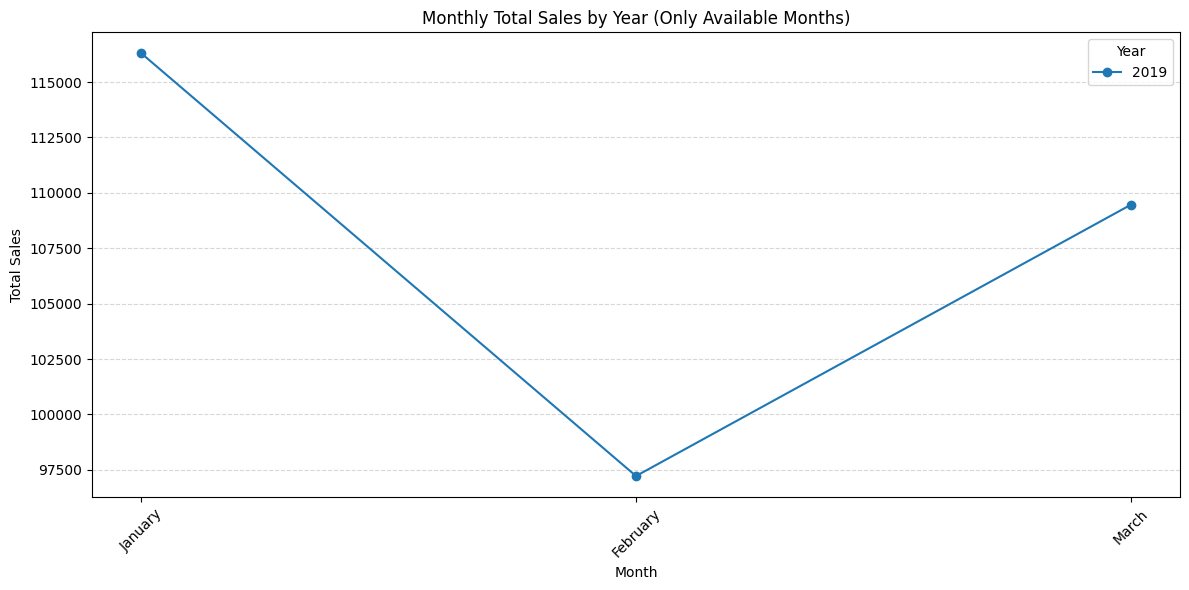

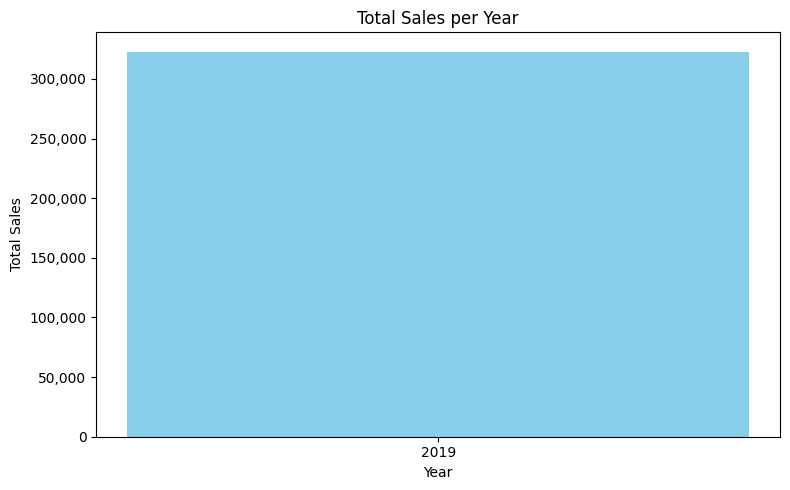

 Monthly Sales (only for available months):
   Year     Month       Total
1  2019   January  116291.868
0  2019  February   97219.374
2  2019     March  109455.507

 Yearly Sales:
   Year       Total
0  2019  322966.749


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


fact_with_date = fact_table_star.merge(datetime_dim_star, on='DateTime_ID', how='left')
fact_with_date['Date'] = pd.to_datetime(fact_with_date['Date'])

fact_with_date['Year'] = fact_with_date['Date'].dt.year
fact_with_date['Month'] = fact_with_date['Date'].dt.month_name()


monthly_sales = (
    fact_with_date.groupby(['Year', 'Month'])['Total']
    .sum()
    .reset_index()
)


fact_with_date['Month_Num'] = fact_with_date['Date'].dt.month
monthly_sales = monthly_sales.merge(
    fact_with_date[['Month', 'Month_Num']].drop_duplicates(), on='Month', how='left'
)
monthly_sales = monthly_sales.sort_values(['Year', 'Month_Num']).drop(columns='Month_Num')

yearly_sales = (
    fact_with_date.groupby('Year')['Total']
    .sum()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    ax.plot(data['Month'], data['Total'], marker='o', label=str(year))

ax.set_title('Monthly Total Sales by Year (Only Available Months)')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Month')
ax.legend(title='Year')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(yearly_sales['Year'].astype(str), yearly_sales['Total'], color='skyblue')
ax.set_title('Total Sales per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


print(" Monthly Sales (only for available months):")
print(monthly_sales)

print("\n Yearly Sales:")
print(yearly_sales)

##4

## الف

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
هدف این بخش بررسی و نمایش روند فروش روزانه برای هر شعبه فروشگاه با استفاده از داده های مدل شده در قالب Star Schema است. در این تحلیل، فروش هر شعبه به تفکیک روز محاسبه شده و هم به صورت متنی و هم نموداری نمایش داده می شود.
در ابتدا جدول واقعیت fact_table_star با جدول بعد شعبه branch_dim_star برای دریافت نام هر شعبه و با جدول بعد زمان datetime_dim_star برای استخراج تاریخ تراکنش ادغام شده اند.
سپس برای امکان گروه بندی زمانی، ستون Date به فرمت تاریخ میلادی (datetime) تبدیل شده است. در مرحله بعد مجموع فروش برای هر ترکیب از Data و Branch محاسبه شده است و سپس نتایج بر اساس تاریخ و نام شعبه مرتب سازی شدند و خروجی اطلاعات برای هر روز و هر شعبه چاپ شدند. همچنین نمودار های مربوط به فروش روزانه هر شعبه نیز رسم شدند که در زیر قابل مشاهده اند.



📅 2019-01-01:
  Branch A: 2371
  Branch B: 1536
  Branch C: 837

📅 2019-01-02:
  Branch A: 307
  Branch B: 1162
  Branch C: 475

📅 2019-01-03:
  Branch A: 937
  Branch B: 1016
  Branch C: 124

📅 2019-01-04:
  Branch A: 483
  Branch B: 510
  Branch C: 629

📅 2019-01-05:
  Branch A: 2024
  Branch B: 486
  Branch C: 1025

📅 2019-01-06:
  Branch A: 1309
  Branch B: 1021
  Branch C: 1282

📅 2019-01-07:
  Branch A: 1105
  Branch B: 1341
  Branch C: 386

📅 2019-01-08:
  Branch A: 683
  Branch B: 2208
  Branch C: 2401

📅 2019-01-09:
  Branch A: 202
  Branch B: 168
  Branch C: 2650

📅 2019-01-10:
  Branch A: 731
  Branch B: 1348
  Branch C: 1480

📅 2019-01-11:
  Branch A: 1661
  Branch C: 453

📅 2019-01-12:
  Branch A: 1429
  Branch B: 2312
  Branch C: 1443

📅 2019-01-13:
  Branch A: 1112
  Branch B: 735
  Branch C: 603

📅 2019-01-14:
  Branch A: 1096
  Branch B: 1191
  Branch C: 1679

📅 2019-01-15:
  Branch A: 1806
  Branch B: 2862
  Branch C: 1275

📅 2019-01-16:
  Branch A: 863
  Branch B: 8

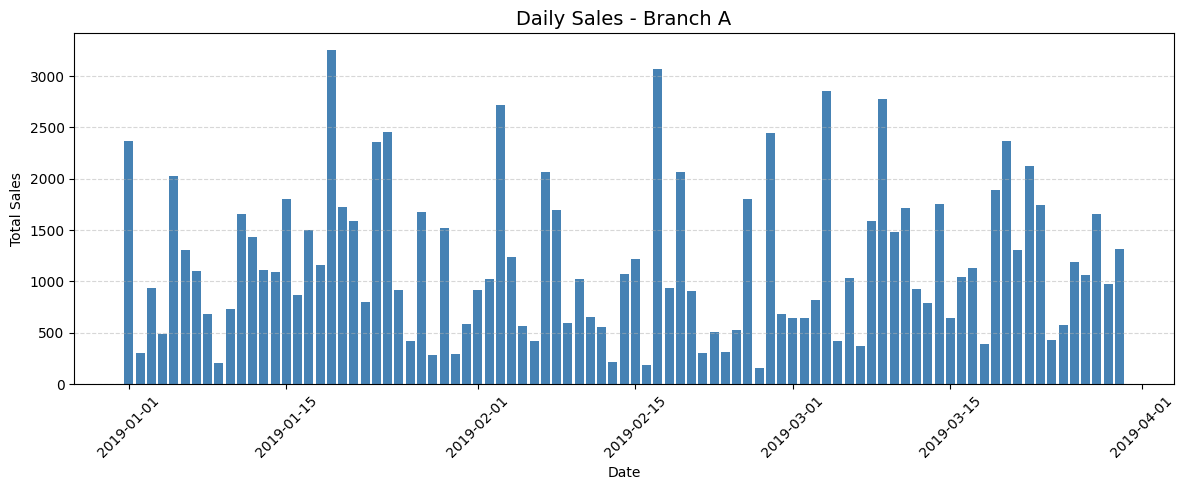

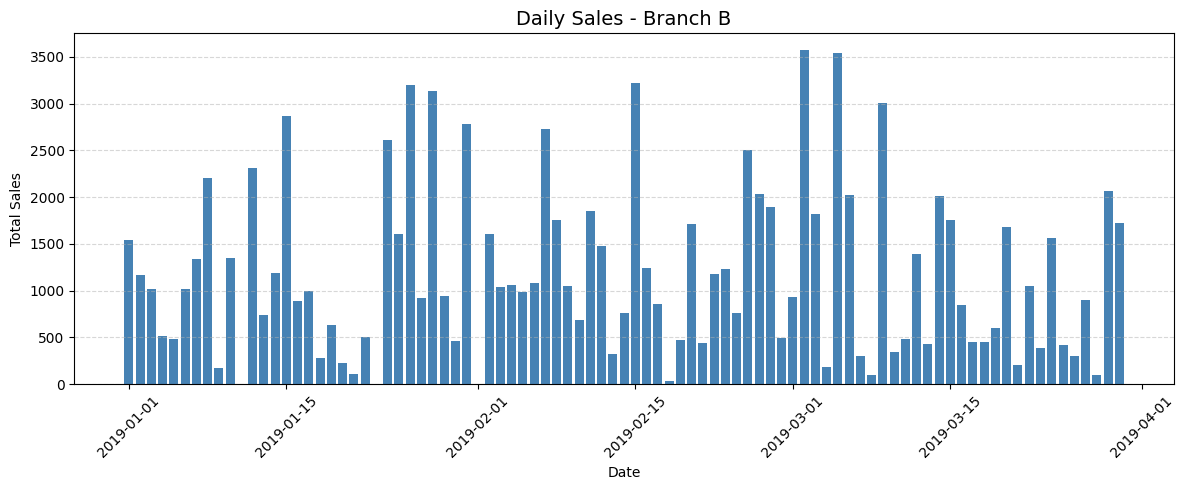

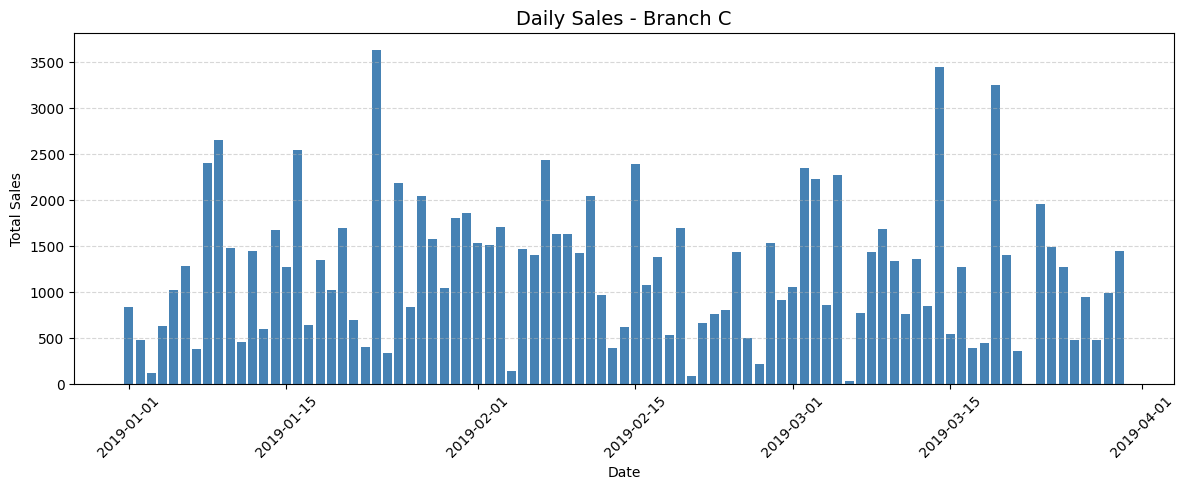

In [16]:
import matplotlib.pyplot as plt


df_branch = fact_table_star.merge(branch_dim_star[['Branch_ID', 'Branch']], on='Branch_ID', how='left') \
                           .merge(datetime_dim_star[['DateTime_ID', 'Date']], on='DateTime_ID', how='left')

df_branch['Date'] = pd.to_datetime(df_branch['Date'])


daily_sales_per_branch = df_branch.groupby(['Date', 'Branch'])['Total'].sum().reset_index()


daily_sales_per_branch = daily_sales_per_branch.sort_values(by=['Date', 'Branch'])


for date, group in daily_sales_per_branch.groupby('Date'):
    print(f"\n📅 {date.date()}:")
    for _, row in group.iterrows():
        print(f"  Branch {row['Branch']}: {int(row['Total'])}")


branches = daily_sales_per_branch['Branch'].unique()

for branch in sorted(branches):
    branch_data = daily_sales_per_branch[daily_sales_per_branch['Branch'] == branch]

    plt.figure(figsize=(12, 5))
    plt.bar(branch_data['Date'], branch_data['Total'], color='steelblue')

    plt.title(f'Daily Sales - Branch {branch}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.show()

## ب

In [18]:
selected_branch = 'A'
branch_data = df_branch[df_branch['Branch'] == selected_branch]
daily_sales = branch_data.groupby('Date')['Total'].sum().reset_index()

max_day = daily_sales.loc[daily_sales['Total'].idxmax()]
min_day = daily_sales.loc[daily_sales['Total'].idxmin()]

print(f"Highest sale day in branch {selected_branch}: {max_day['Date'].date()} → {int(max_day['Total'])}")
print(f"Lowest sale day in branch {selected_branch}: {min_day['Date'].date()} → {int(min_day['Total'])}")

Highest sale day in branch A: 2019-01-19 → 3254
Lowest sale day in branch A: 2019-02-26 → 156


<ipython-input-19-532c1d881695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_data['Weekday'] = branch_data['Date'].dt.dayofweek


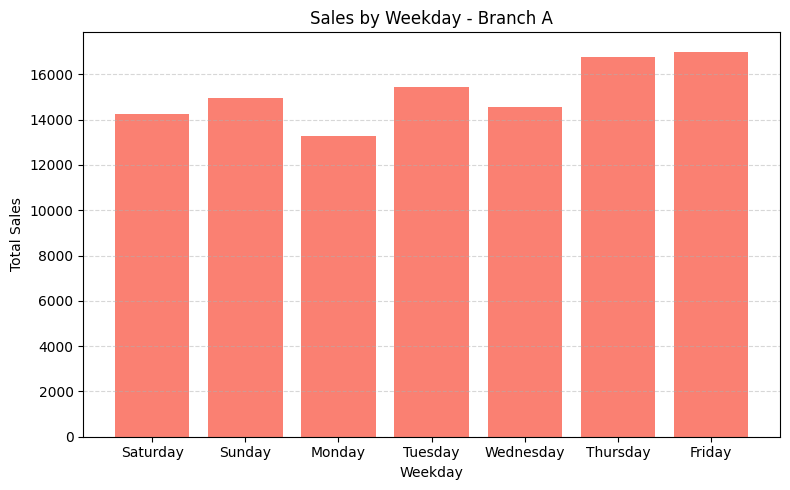

In [19]:

branch_data['Weekday'] = branch_data['Date'].dt.dayofweek


weekday_sales = branch_data.groupby('Weekday')['Total'].sum().reset_index()


weekday_map = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
weekday_sales['Weekday Name'] = weekday_sales['Weekday'].map(weekday_map)
plt.figure(figsize=(8,5))
plt.bar(weekday_sales['Weekday Name'], weekday_sales['Total'], color='salmon')
plt.title(f'Sales by Weekday - Branch {selected_branch}')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## 5

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">


هدف از اجرای این کد، ساخت یک OLAP Cube دو بعدی ساده با استفاده از Pivot Table در پایتون است تا مجموع فروش را به تفکیک شهر و شعبه نمایش دهد.
از تابع pd.pivot_table کتابخانه Pandas استفاده شده است. ستون مقدار (value) برابر با Total که نشان دهنده مجموع فروش هر رکورد است. سطر ها بر اساس نام شهر و ستون ها بر اساس نام شعبه تعریف شده اند. سپس از تابع sum برای تجمیع فروش استفاده شده است و یک ردیف و یک ستون اضافی به جدول اضافه شده است که جمع کل را برای هر ردیف و ستون نمایش می دهد که حاصل به شکل زیر است:


In [20]:

cube_city_branch = pd.pivot_table(df,
                                   values='Total',
                                   index='City',
                                   columns='Branch',
                                   aggfunc='sum',
                                   margins=True,
                                   margins_name='sum')

cube_city_branch

Branch,A,B,C,sum
City,,,,
Mandalay,NaN,106197.672,NaN,106197.6720
Naypyitaw,NaN,NaN,110568.7065,110568.7065
Yangon,106200.3705,NaN,NaN,106200.3705
sum,106200.3705,106197.672,110568.7065,322966.7490


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

در این قسمت نیز با استفاده از sum(axis=1) مجموع فروش در هر ردیف یعنی هر شهر محاسبه شده است. و شهری که بیشترین فروش را داشته با استفاده از idmax() شناسایی ش و در متغیر top_city ذخیره شده است.
برای محاسبه فروش کل به تفکیک شعبه از ردیف sum در pivot table مجموع فروش مربوط به هر شعبه استخراج شده است. سپس ستون sum حذف شد تا فقط شعبه ها باقی بمانند. شعبه با بیشترین فروش با استفاده از idmax() شناسایی شده و در متغیر top_branch ذخیره شده است که نتایج حاصله از این بخش به صورت زیر است:


In [21]:
city_sales = cube_city_branch.drop('sum').sum(axis=1)
top_city = city_sales.idxmax()

branch_sales = cube_city_branch.loc['sum'].drop('sum')
top_branch = branch_sales.idxmax()

print(f"City with maximum seles: {top_city}")
print(f"Branch with maximum seles: {top_branch}")

City with maximum seles: Naypyitaw
Branch with maximum seles: C


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">


در این بخش، با استفاده از مدل Star Schema، یک جدول pivot دو بعدی به‌منظور تحلیل مجموع فروش به تفکیک خط محصول (Product line) و شهر (City) ایجاد شده است. ابتدا جدول واقعیت fact_table_star با جدول‌ های ابعاد branch_dim_star و product_dim_star ادغام شد تا ستون‌های مورد نیاز شامل City و Product line به داده‌ ها افزوده شود. سپس با استفاده از pd.pivot_table، یک Data Cube ساخته شد که در آن سطرها نمایانگر خطوط محصول و ستون ‌ها نمایان گر شهرها بودند و مقادیر داخل جدول مجموع فروش ‌ها را نمایش می ‌دادند. در ادامه، برای هر خط محصول، شهری که بیش ترین فروش را به خود اختصاص داده با استفاده از تابع idxmax() شناسایی شد. در نهایت، برای هر محصول، نام شهر و مقدار فروش آن به‌صورت متنی چاپ شده است که نشان می ‌دهد کدام شهر بهترین عملکرد فروش را برای هر خط محصول داشته است که نتایج به شرح زیر است:

In [22]:
import pandas as pd


df_branch_star = fact_table_star.merge(branch_dim_star[['Branch_ID', 'City', 'Branch']],
                                       on='Branch_ID', how='left') \
                                .merge(product_dim_star[['Product_ID', 'Product line']],
                                       on='Product_ID', how='left')

df_branch_star = df_branch_star[['City', 'Branch', 'Product line', 'Total']]

cube_product_city_star = pd.pivot_table(df_branch_star,
                                        index='Product line',
                                        columns='City',
                                        values='Total',
                                        aggfunc='sum',
                                        fill_value=0,
                                        margins=True,
                                        margins_name='Total')


print("\nTotal Sales by Product Line and City:")
print(cube_product_city_star)


print("\nBest-selling City per Product Line:")
for product in cube_product_city_star.index:
    if product != 'Total':
        row = cube_product_city_star.loc[product].drop('Total', errors='ignore')
        best_city = row.idxmax()
        max_sales = row.max()
        print(f"• {product}: {best_city} → {int(max_sales)}")


Total Sales by Product Line and City:
City                       Mandalay    Naypyitaw       Yangon        Total
Product line                                                              
Electronic accessories   17051.4435   18968.9745   18317.1135   54337.5315
Fashion accessories      16413.3165   21560.0700   16332.5085   54305.8950
Food and beverages       15214.8885   23766.8550   17163.1005   56144.8440
Health and beauty        19980.6600   16615.3260   12597.7530   49193.7390
Home and lifestyle       17549.1645   13895.5530   22417.1955   53861.9130
Sports and travel        19988.1990   15761.9280   19372.6995   55122.8265
Total                   106197.6720  110568.7065  106200.3705  322966.7490

Best-selling City per Product Line:
• Electronic accessories: Naypyitaw → 18968
• Fashion accessories: Naypyitaw → 21560
• Food and beverages: Naypyitaw → 23766
• Health and beauty: Mandalay → 19980
• Home and lifestyle: Yangon → 22417
• Sports and travel: Mandalay → 19988


## 6


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

در این بخش با استفاده از مدل Star Schema، پروفایل مشتریان محصولات مربوط به دسته “Electronic accessories” استخراج شده است. ابتدا جدول واقعیت با جدول ابعاد محصول ادغام شده تا نام خط محصول برای هر تراکنش مشخص شود. سپس تنها رکوردهایی که مربوط به محصولات “Electronic accessories” هستند فیلتر شده اند. در ادامه، اطلاعات مشتری شامل جنسیت و نوع مشتری (عضو یا عادی) از طریق اتصال به جدول مشتریان به رکوردها اضافه شده است. پس از آن، تعداد خریدها به تفکیک جنسیت و نوع مشتری محاسبه شده و نسبت هر گروه نسبت به کل خریدها نیز محاسبه گردیده است. در نهایت این توزیع با استفاده از نمودار میله ای نمایش داده شده تا مقایسه ای بصری از ترجیحات خریداران این دسته محصول ارائه شود.

Customer profile for Electronic accessories (Star Schema):
  Customer type  Gender  Count     Ratio
0        Member  Female     35  0.205882
1        Member    Male     43  0.252941
2        Normal  Female     49  0.288235
3        Normal    Male     43  0.252941


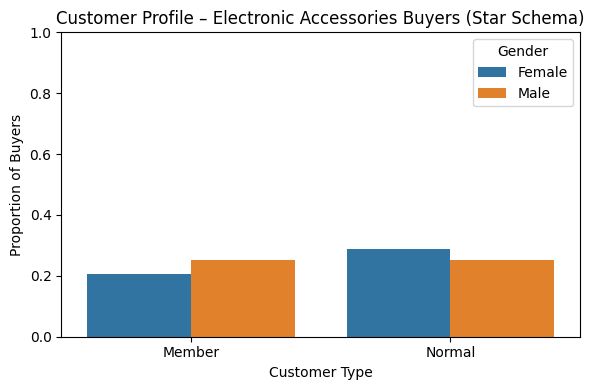

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ea_records_star = fact_table_star.merge(product_dim_star[['Product_ID', 'Product line']],
                                        on='Product_ID', how='left')


ea_records_star = ea_records_star[ea_records_star['Product line'] == 'Electronic accessories']


ea_customers_star = ea_records_star.merge(customers_dim_star[['Customer_ID', 'Gender', 'Customer type']],
                                          on='Customer_ID', how='left')

ea_profile_star = ea_customers_star.groupby(['Customer type', 'Gender']).size().reset_index(name='Count')
ea_profile_star['Ratio'] = ea_profile_star['Count'] / ea_profile_star['Count'].sum()

print("Customer profile for Electronic accessories (Star Schema):")
print(ea_profile_star)

plt.figure(figsize=(6,4))
sns.barplot(data=ea_profile_star, x='Customer type', y='Ratio', hue='Gender')
plt.title("Customer Profile – Electronic Accessories Buyers (Star Schema)")
plt.xlabel("Customer Type")
plt.ylabel("Proportion of Buyers")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">


در این بخش با استفاده از مدل Star Schema، ترجیحات خرید مشتریان در دسته های مختلف محصول به تفکیک نوع مشتری (عضو یا عادی) بررسی شده است. ابتدا جدول واقعیت با جداول مشتری و محصول ادغام شده تا اطلاعات مربوط به نوع مشتری و خط محصول به هر رکورد فروش اضافه شود. سپس با گروه بندی بر اساس ترکیب “Customer type × Product line”، تعداد خریدها برای هر گروه محاسبه شده است. به منظور مقایسه نسبی، تعداد خریدها درون هر گروه مشتری نرمال سازی شده و نسبت سهم هر خط محصول از کل خریدهای آن گروه به دست آمده است. در ادامه، جدول نهایی به صورت نمودار میله ای ترسیم شده تا ترجیحات نسبی مشتریان عضو و غیرعضو نسبت به خطوط مختلف محصول به صورت بصری قابل مقایسه باشد که نتایج به شرح زیر است:

Product Preference Ratio (per Customer Type) – Star Schema:
   Customer type            Product line  Count     Ratio
0         Member  Electronic accessories     78  0.155689
1         Member     Fashion accessories     86  0.171657
2         Member      Food and beverages     94  0.187625
3         Member       Health and beauty     73  0.145709
4         Member      Home and lifestyle     83  0.165669
5         Member       Sports and travel     87  0.173653
6         Normal  Electronic accessories     92  0.184369
7         Normal     Fashion accessories     92  0.184369
8         Normal      Food and beverages     80  0.160321
9         Normal       Health and beauty     79  0.158317
10        Normal      Home and lifestyle     77  0.154309
11        Normal       Sports and travel     79  0.158317


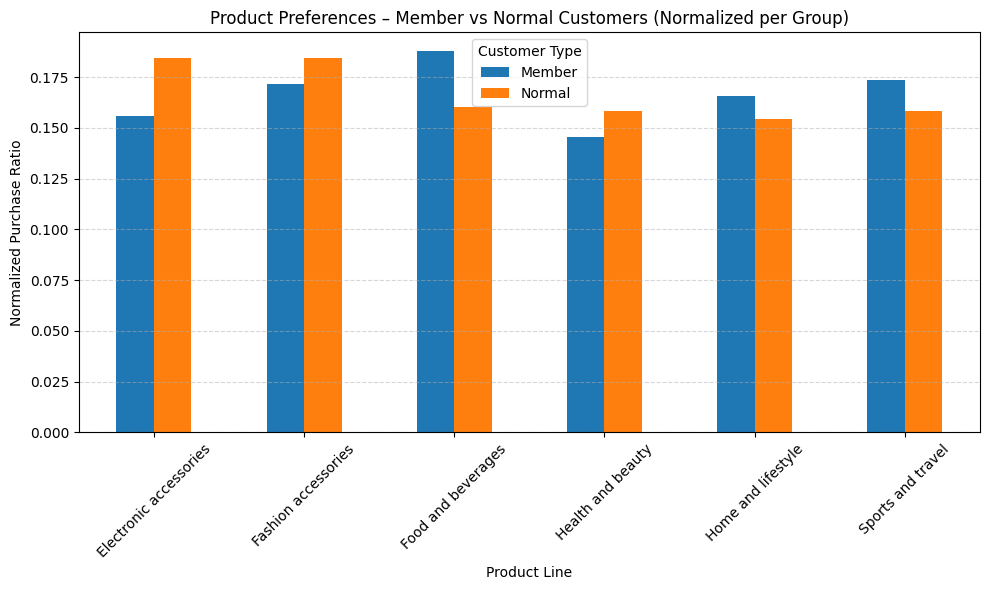

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


full_data_star = fact_table_star \
    .merge(customers_dim_star[['Customer_ID', 'Customer type']], on='Customer_ID', how='left') \
    .merge(product_dim_star[['Product_ID', 'Product line']], on='Product_ID', how='left')

group_counts_star = full_data_star.groupby(['Customer type', 'Product line']).size().reset_index(name='Count')

group_totals_star = group_counts_star.groupby('Customer type')['Count'].transform('sum')
group_counts_star['Ratio'] = group_counts_star['Count'] / group_totals_star


print("Product Preference Ratio (per Customer Type) – Star Schema:")
print(group_counts_star)


pivot_star = group_counts_star.pivot(index='Product line', columns='Customer type', values='Ratio').fillna(0)
pivot_star.plot(kind='bar', figsize=(10,6))
plt.title("Product Preferences – Member vs Normal Customers (Normalized per Group)")
plt.ylabel("Normalized Purchase Ratio")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()